In [1]:
!pip install -q paretoset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import random
from paretoset import paretoset
import matplotlib.pyplot as plt

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)

num_areas = 15   # Number of areas
num_centers = 5   # Number of centers
num_resource_types = 3  # Number of resource types

# Priority levels for each area (1: low, 2: middle, 3: high)
priority_levels = [random.choice([1, 2, 3]) for _ in range(num_areas)]

# Generate a random distance matrix between centers (rows) and areas (columns)
# Each entry represents the time/distance from center i to area j
distance_matrix = np.random.randint(1, 51, size=(num_centers, num_areas))

# Resource limits for each center (each center can only allocate so much of each resource)
resource_limits = np.random.randint(50, 100, size=(num_centers, num_resource_types))

# Resource demands per area (how much resource each area needs)
area_demands = np.random.randint(20, 60, size=(num_areas, num_resource_types))


num_generations = 500  # Specify number of generations
population_size = 250   # Specify size of population

# Print generated data
print("Priority Levels:", priority_levels)
print("Distance Matrix:\n", distance_matrix)
print("Resource Limits:", resource_limits)
print("Area Demands:", area_demands)

Priority Levels: [3, 1, 1, 3, 2, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3]
Distance Matrix:
 [[39 29 15 43  8 21 39 19 23 11 11 24 36 40 24]
 [ 3 22  2 24 44 30 38  2 21 33 12 22 44 25 49]
 [27 42 28 16 15 47 44  3 37  7 21  9 39 18  4]
 [25 14 50  9 26  2 20 28 47  7 44  8 47 35 14]
 [17 36 50 40  4  2  6 42  4 29 18 26 44 34 10]]
Resource Limits: [[85 63 80]
 [97 64 57]
 [63 72 89]
 [70 65 94]
 [67 96 73]]
Area Demands: [[45 44 48]
 [34 20 44]
 [26 28 43]
 [20 27 43]
 [30 36 27]
 [54 54 52]
 [24 58 47]
 [26 28 27]
 [31 53 52]
 [42 43 56]
 [54 59 41]
 [46 54 20]
 [54 56 33]
 [22 20 24]
 [45 33 58]]


In [11]:
def initialize_population(pop_size, num_centers, num_areas, num_resource_types, resource_limits, area_demands, priority_levels):
    population = []

    for _ in range(pop_size):
        # Create a new chromosome initialized to zeros
        chromosome = np.zeros((num_centers, num_areas, num_resource_types), dtype=int)

        # Create a copy of the resource limits for this chromosome
        remaining_resources = resource_limits.copy()

        for j in range(num_areas):  # For each area
            # Initialize total allocation for the area
            total_allocation = np.zeros(num_resource_types, dtype=int)  # Track allocation per resource type

            if priority_levels[j] == 3:  # High priority area
                # Allow multiple centers to allocate resources
                centers_serving = random.sample(range(num_centers), random.randint(1, num_centers))  # Randomly select centers
                for center in centers_serving:
                    for k in range(num_resource_types):  # For each resource type
                        # Calculate the maximum allocation considering the remaining demand for the area
                        max_allocation = area_demands[j][k] - total_allocation[k]  # Demand minus already allocated resources

                        # Allocate resources without exceeding the resource limit for that type
                        if max_allocation > 0:  # Only allocate if there's still demand
                            allocation = random.randint(0, min(remaining_resources[center][k], max_allocation))
                            chromosome[center, j, k] = allocation
                            remaining_resources[center][k] -= allocation  # Reduce remaining resources for that type
                            total_allocation[k] += allocation  # Update total allocation for the resource type

            else:  # Low or middle priority area (1 or 2)
                center = random.randint(0, num_centers - 1)  # Randomly choose one center
                for k in range(num_resource_types):  # For each resource type
                    # Calculate the maximum allocation considering the remaining demand for the area
                    max_allocation = area_demands[j][k] - total_allocation[k]  # Demand minus already allocated resources

                    # Allocate resources without exceeding the resource limit for that type
                    if max_allocation > 0:  # Only allocate if there's still demand
                        allocation = random.randint(0, min(remaining_resources[center][k], max_allocation))
                        chromosome[center, j, k] = allocation
                        remaining_resources[center][k] -= allocation  # Reduce remaining resources for that type
                        total_allocation[k] += allocation  # Update total allocation for the resource type

        population.append(chromosome)

    return np.array(population)

def fitness_distance(chromosome, distance_matrix, priority_levels):
    total_distance = 0
    for center in range(chromosome.shape[0]):
        for area in range(chromosome.shape[1]):
            if np.sum(chromosome[center, area, :]) > 0:  # Check if any resource has been allocated
                weight = 1 / priority_levels[area]
                total_distance += distance_matrix[center, area] * weight
    return total_distance



def fitness_demand(chromosome, area_demands, resource_limits):
    total_demand_met = 0
    penalty = 0
    for center in range(chromosome.shape[0]):
        total_resources_allocated = np.zeros(chromosome.shape[2], dtype=int)
        for area in range(chromosome.shape[1]):
            for resource_type in range(chromosome.shape[2]):
                total_demand_met += chromosome[center, area, resource_type]


    return total_demand_met

def evaluate_fitness(chromosome, area_demands, resource_limits, distance_matrix, priority_levels):
    distance_fitness = fitness_distance(chromosome, distance_matrix, priority_levels)
    demand_fitness = fitness_demand(chromosome, area_demands, resource_limits)
    return distance_fitness, demand_fitness

# Crossover functions
def uniform_crossover(parent1, parent2):
    mask = np.random.randint(0, 2, parent1.shape).astype(bool)
    child = np.where(mask, parent1, parent2)
    return child

def two_point_crossover(parent1, parent2):
    child = np.copy(parent1)
    point1, point2 = sorted(random.sample(range(parent1.shape[0]), 2))
    child[point1:point2] = parent2[point1:point2]
    return child

def combined_crossover(parent1, parent2):
    if random.random() < 0.5:
        return uniform_crossover(parent1, parent2)
    else:
        return two_point_crossover(parent1, parent2)

# Mutation function
def mutate(chromosome, area_demands, resource_limits, mutation_rate=0.5):
    for center in range(chromosome.shape[0]):
        for area in range(chromosome.shape[1]):
            for resource_type in range(chromosome.shape[2]):
                if random.random() < mutation_rate:
                    # Only mutate if the allocation does not exceed area demands
                    current_allocation = chromosome[center, area, resource_type]
                    max_allocation = area_demands[area][resource_type] - np.sum(chromosome[center, area, :])  # Remaining demand for the area
                    if max_allocation > 0:
                        # Adjust the mutation within bounds
                        chromosome[center, area, resource_type] = random.randint(0, min(max_allocation, resource_limits[center][resource_type]))
    return chromosome

def tournament_selection(population, fitness_values, tournament_size=5, weights = (0.5, 0.5)):
    selected_parents = []
    for _ in range(2):  # Select 2 parents
        actual_tournament_size = min(tournament_size, len(population))
        competitors_indices = random.sample(range(len(population)), actual_tournament_size)
        competitors_fitness = fitness_values[competitors_indices]

        # Calculate combined scores using weights
        combined_scores = [
            weights[0] * fitness[0] + weights[1] * fitness[1] for fitness in competitors_fitness
        ]

        # Find the best index based on combined scores (minimizing the score)
        best_index = competitors_indices[np.argmin(combined_scores)]
        selected_parents.append(population[best_index])

    return selected_parents


def elitism(population, fitness_values, num_elites=0.1*population_size):
    """
    Select the top 'num_elites' chromosomes based on fitness, considering both objectives:
    - Minimize distance (fitness_values[:, 0])
    - Maximize demand met (fitness_values[:, 1])
    """
    # Sort by minimum distance first and then by maximum demand met
    elite_indices = np.lexsort((-fitness_values[:, 1], fitness_values[:, 0]))[:num_elites]
    elites = population[elite_indices]
    return elites




In [14]:
def repair_chromosome(chromosome, resource_limits, area_demands):
    """Repair the chromosome to adhere to resource constraints and area demands."""

    # Step 1: Check resource limits for each center
    for center in range(chromosome.shape[0]):
        for resource_type in range(chromosome.shape[2]):
            total_allocated = np.sum(chromosome[center, :, resource_type])
            # If allocation exceeds resource limits, reduce allocations
            if total_allocated > resource_limits[center][resource_type]:
                excess = total_allocated - resource_limits[center][resource_type]
                # Distribute the excess reduction across areas
                for area in range(chromosome.shape[1]):
                    if excess <= 0:
                        break
                    if chromosome[center, area, resource_type] > 0:
                        reduce_amount = min(chromosome[center, area, resource_type], excess)
                        chromosome[center, area, resource_type] -= reduce_amount
                        excess -= reduce_amount

    # Step 2: Check area demands for each area
    for area in range(chromosome.shape[1]):
        for resource_type in range(chromosome.shape[2]):
            total_allocation_for_area = np.sum(chromosome[:, area, resource_type])  # Sum across all centers for this area and resource type
            if total_allocation_for_area > area_demands[area][resource_type]:  # Check if allocation exceeds area demand for that resource type
                excess = total_allocation_for_area - area_demands[area][resource_type]
                # Distribute the excess reduction across centers for this resource type
                for center in range(chromosome.shape[0]):
                    if excess <= 0:
                        break
                    if chromosome[center, area, resource_type] > 0:
                        reduce_amount = min(chromosome[center, area, resource_type], excess)
                        chromosome[center, area, resource_type] -= reduce_amount
                        excess -= reduce_amount

    return chromosome


In [13]:
def plot_pareto_frontier(Xs, Ys, chromosomes, pareto_Xs, pareto_Ys, pareto_chromosomes):
    '''Pareto frontier selection process'''

    # Sort Pareto front points by Distance Fitness first, then by Demand Fitness
    sorted_pareto_front = sorted(zip(pareto_Xs, pareto_Ys, pareto_chromosomes), key=lambda pair: (pair[0], pair[1]))

    # Unzip the sorted Pareto front points
    sorted_pf_Xs, sorted_pf_Ys, sorted_pf_chromosomes = zip(*sorted_pareto_front)

    '''Plotting process'''
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.scatter(Xs, Ys, color='blue', alpha=0.5, label='Solutions', edgecolor='k', s=50)

    # Plot Pareto front points
    plt.plot(sorted_pf_Xs, sorted_pf_Ys, color='red', linewidth=2, label='Pareto Frontier')

    # Highlight the points on the Pareto frontier
    plt.scatter(sorted_pf_Xs, sorted_pf_Ys, color='blue', s=100, label='Pareto Points', edgecolor='k')

    plt.xlabel("Distance Fitness (Minimize)", fontsize=12)
    plt.ylabel("Demand Fitness (Maximize)", fontsize=12)
    plt.title("Pareto Front", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()  # Adjust layout
    plt.show()

    # Print only the chromosomes corresponding to Pareto frontier points
    print("Pareto Frontier Chromosomes:")
    for i, (x, y, chromosome) in enumerate(zip(sorted_pf_Xs, sorted_pf_Ys, sorted_pf_chromosomes)):
        print(f"Point {i + 1} -> Distance Fitness: {x}, Demand Fitness: {y}")
        print(f"Chromosome: \n{chromosome}\n")



In [9]:
def genetic_algorithm(num_generations, population_size, num_centers, num_areas, num_resource_types, resource_limits, area_demands, priority_levels, distance_matrix, convergence_threshold=6, num_elites=5):
    population = initialize_population(population_size, num_centers, num_areas, num_resource_types, resource_limits, area_demands, priority_levels)
    fitness_history = []  # Now stores tuples of (fitness, chromosome)
    best_chromosome = None
    best_fitness = (float('inf'), float('-inf'))  # (min distance, max demand)

    # Initialize variables for convergence check
    last_fitness_values = [None, None]  # To store the last two generations' fitness values
    stagnant_generations = 0

    for generation in range(num_generations):
        # Evaluate fitness and store both fitness values and the corresponding chromosomes
        fitness_values = np.array([evaluate_fitness(chromosome, area_demands, resource_limits, distance_matrix, priority_levels) for chromosome in population])

        # Append the fitness and chromosome tuple to the history for this generation
        fitness_history.append([(fitness_values[i], population[i]) for i in range(len(population))])

        # Check for convergence based on fitness values
        if last_fitness_values[1] is not None:  # If we have at least two generations to compare
            if (abs(fitness_values.mean(axis=0)[0] - last_fitness_values[1][0]) < 10 and
                abs(fitness_values.mean(axis=0)[1] - last_fitness_values[1][1]) < 10):
                stagnant_generations += 1
            else:
                stagnant_generations = 0  # Reset if there is an improvement

        last_fitness_values[0] = last_fitness_values[1]  # Move previous fitness to last
        last_fitness_values[1] = fitness_values.mean(axis=0)  # Store the current fitness values

        # Stop if there are too many stagnant generations
        if stagnant_generations >= convergence_threshold:
            print(f"Convergence reached after {generation + 1} generations due to stagnant fitness values.")
            break  # Exit the loop if convergence is reached

        # Apply elitism to carry over the best chromosomes
        elites = elitism(population, fitness_values, num_elites)

        # Select parents based on fitness using tournament selection
        selected_parents = []
        pareto_mask = paretoset(fitness_values, sense=['min', 'max'])
        selected_population = population[pareto_mask]

        for _ in range((population_size - num_elites) // 2):  # Generate half the population size (2 parents at a time)
            parent1, parent2 = tournament_selection(selected_population, fitness_values[pareto_mask])
            selected_parents.append(parent1)
            selected_parents.append(parent2)

        new_population = list(elites)  # Start new population with elites
        for parent1, parent2 in zip(selected_parents[::2], selected_parents[1::2]):
            child = combined_crossover(parent1, parent2)
            child = mutate(child, area_demands, resource_limits)  # Pass area demands
            child = repair_chromosome(child, resource_limits, area_demands)  # Repair after mutation
            new_population.append(child)

        population = np.array(new_population)


    return fitness_history, fitness_values

In [15]:
# Run the genetic algorithm
fitness_history, fitness_values = genetic_algorithm(
    num_generations,
    population_size,
    num_centers,
    num_areas,
    num_resource_types,
    resource_limits,
    area_demands,
    priority_levels,
    distance_matrix
)

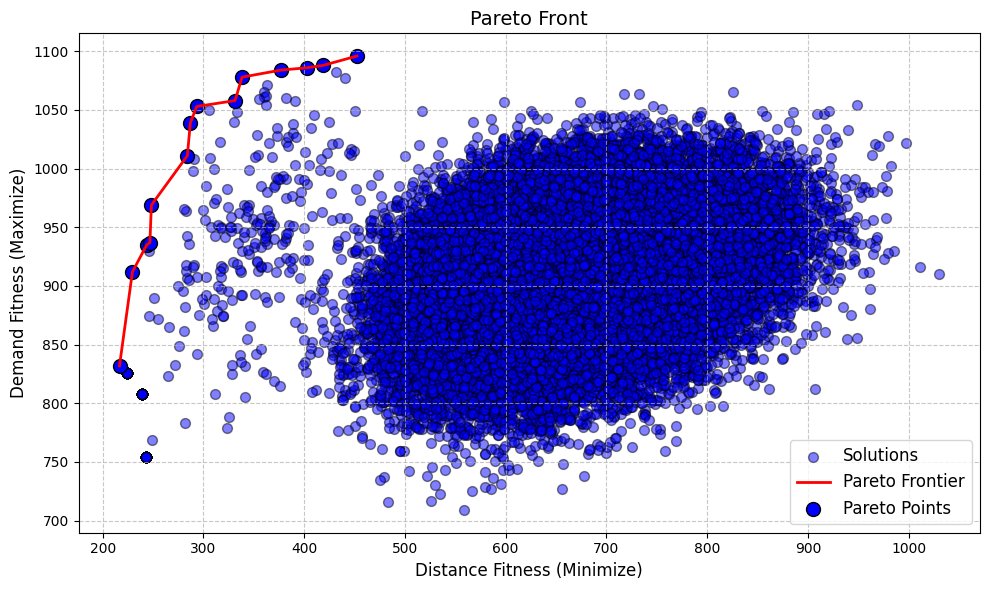

Pareto Frontier Chromosomes:
Point 1 -> Distance Fitness: 216.66666666666666, Demand Fitness: 832.0
Chromosome: 
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  2  1]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0 11  6]
  [ 0  0  0]
  [ 1  1  9]
  [ 0  0  0]
  [ 1  6 25]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 7  1 32]
  [ 8 13  5]
  [ 6  2  2]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [46 31  2]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [12 28 27]
  [21  0 29]
  [ 0  0  0]
  [ 2  2  6]
  [27 23  0]
  [ 1 10  7]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 8  0 13]
  [ 0  0  0]
  [ 0  4  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [37 30 23]
  [ 5 19 22]
  [ 3  4  1]
  [ 0  0  0]
  [ 8  7  0]
  [ 0  0  0]]

 [[ 6  2 13]
  [ 0  0  0]
  [ 0  0  0]
  [12  6 37]
  [ 0  0  0]
  [32 42 20]
  [15  5  1]
  [ 0  0

In [16]:
# Extract fitness and corresponding chromosomes from the final population
distance_fitness = []
demand_fitness = []
chromosome_list = []

for generation in fitness_history:
    for (fitness, chromosome) in generation:
        distance_fitness.append(fitness[0])  # Distance fitness
        demand_fitness.append(fitness[1])    # Demand fitness
        chromosome_list.append(chromosome)   # Corresponding chromosome

# Convert to numpy arrays
distance_fitness = np.array(distance_fitness)
demand_fitness = np.array(demand_fitness)
chromosome_list = np.array(chromosome_list)

# Apply Pareto set filtering to get only the Pareto-optimal points
pareto_mask = paretoset(np.array(list(zip(distance_fitness, demand_fitness))), sense=['min', 'max'])
pareto_distance_fitness = distance_fitness[pareto_mask]
pareto_demand_fitness = demand_fitness[pareto_mask]
pareto_chromosome_list = chromosome_list[pareto_mask]

# Plot the Pareto frontier and print the chromosomes associated with each Pareto frontier point
plot_pareto_frontier(distance_fitness, demand_fitness, chromosome_list, pareto_distance_fitness, pareto_demand_fitness, pareto_chromosome_list)

In [17]:
# Initialize the optimizer with an initial solution

initial_solution = np.array([
    [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 2, 1], [0, 0, 0],
     [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 11, 6], [0, 0, 0],
     [1, 1, 9], [0, 0, 0], [1, 6, 25], [0, 0, 0], [0, 0, 0]],

    [[0, 0, 0], [0, 0, 0], [7, 1, 32], [8, 13, 5], [6, 2, 2],
     [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0],
     [46, 31, 2], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],

    [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0],
     [0, 0, 0], [0, 0, 0], [12, 28, 27], [21, 0, 29], [0, 0, 0],
     [2, 2, 6], [27, 23, 0], [1, 10, 7], [0, 0, 0], [0, 0, 0]],

    [[0, 0, 0], [8, 0, 13], [0, 0, 0], [0, 4, 0], [0, 0, 0],
     [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [37, 30, 23],
     [5, 19, 22], [3, 4, 1], [0, 0, 0], [8, 7, 0], [0, 0, 0]],

    [[6, 2, 13], [0, 0, 0], [0, 0, 0], [12, 6, 37], [0, 0, 0],
     [32, 42, 20], [15, 5, 1], [0, 0, 0], [1, 41, 2], [0, 0, 0],
     [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
])

def calculate_distance(chromosome, distance_matrix, priority_levels):
    total_distance = 0
    for center in range(chromosome.shape[0]):
        for area in range(chromosome.shape[1]):
            if np.sum(chromosome[center, area, :]) > 0:  # Check if any resource has been allocated
                weight = 1 / priority_levels[area]
                total_distance += distance_matrix[center, area] * weight
    return total_distance



def calculate_demand(chromosome, area_demands):
    total_demand_met = 0

    for center in range(chromosome.shape[0]):
        total_resources_allocated = np.zeros(chromosome.shape[2], dtype=int)
        for area in range(chromosome.shape[1]):
            for resource_type in range(chromosome.shape[2]):
                total_demand_met += chromosome[center, area, resource_type]

    return total_demand_met

In [18]:
class SimulatedAnnealing:
    def __init__(self, initial_solution, max_iterations=10000, initial_temp=1000, cooling_rate=0.995, min_temp=1e-5, num_neighbors=50):
        self.current_solution = initial_solution
        self.best_solution = initial_solution.copy()  # Initialize best solution as the initial solution
        self.max_iterations = max_iterations
        self.initial_temp = initial_temp
        self.cooling_rate = cooling_rate
        self.min_temp = min_temp
        self.num_neighbors = num_neighbors  # Number of neighbors to generate per iteration
        self.history = []  # Store fitness history

    def simulated_annealing_move(self, solution, resource_limits, area_demands):
          """Perform a small neighborhood exploration move for simulated annealing."""
          new_solution = solution.copy()

          center_index = random.randint(0, solution.shape[0] - 1)
          area_index = random.randint(0, solution.shape[1] - 1)
          resource_type_index = random.randint(0, solution.shape[2] - 1)

          current_allocation = np.sum(new_solution[:, area_index, resource_type_index])

          if current_allocation < area_demands[area_index, resource_type_index]:
              total_allocated = np.sum(new_solution[center_index, :, resource_type_index])
              if total_allocated < resource_limits[center_index, resource_type_index]:
                  new_solution[center_index, area_index, resource_type_index] += 1

          elif current_allocation >= area_demands[area_index, resource_type_index]:
              if new_solution[center_index, area_index, resource_type_index] > 0:
                  new_solution[center_index, area_index, resource_type_index] -= 1

          return new_solution

    def generate_neighbour(self, resource_limits, area_demands):
        """Generate a neighboring solution by making very small localized changes."""
        return self.simulated_annealing_move(self.current_solution, resource_limits, area_demands)

    def anneal(self, distance_matrix, priority_levels, area_demands, resource_limits):
      current_temp = self.initial_temp
      no_improvement_count = 0
      max_no_improvement = 1000  # Stop after 1000 iterations with no improvement

      while current_temp > self.min_temp and no_improvement_count < max_no_improvement:
          for _ in range(100):  # Fixed number of iterations per temperature
              best_neighbor = None
              best_distance = float('inf')
              best_demand = float('-inf')

              # Generate multiple neighbors and select the best one
              for _ in range(self.num_neighbors):
                  new_solution = self.generate_neighbour(resource_limits, area_demands)
                  new_distance = calculate_distance(new_solution, distance_matrix, priority_levels)
                  new_demand = calculate_demand(new_solution, area_demands)

                  # Update best neighbor if it improves on either objective
                  if new_distance < best_distance or new_demand > best_demand:
                      best_neighbor = new_solution
                      best_distance = new_distance
                      best_demand = new_demand

              current_distance = calculate_distance(self.current_solution, distance_matrix, priority_levels)
              current_demand = calculate_demand(self.current_solution, area_demands)

              self.history.append((self.current_solution.copy(), (current_distance, current_demand)))

              # Accept the best neighbor if it improves either objective
              if best_neighbor is (best_distance < current_distance or best_demand > current_demand):
                  self.current_solution = best_neighbor
                  if best_distance < calculate_distance(self.best_solution, distance_matrix, priority_levels):
                      self.best_solution = best_neighbor.copy()
                  no_improvement_count = 0  # Reset counter if improvement found
              else:
                  # Calculate acceptance probability for worse solutions
                  delta = (current_distance - best_distance) / current_temp
                  acceptance_prob = np.exp(min(delta, 700))  # Cap delta to avoid overflow

                  if random.uniform(0, 1) < acceptance_prob:
                      self.current_solution = best_neighbor
                  no_improvement_count += 1  # Increment if no improvement found

          current_temp *= self.cooling_rate

      return self.history



In [19]:
# Run the simulated annealing
if __name__ == "__main__":
    sa = SimulatedAnnealing(initial_solution)
    fitness_history1 = sa.anneal(distance_matrix, priority_levels, area_demands, resource_limits)

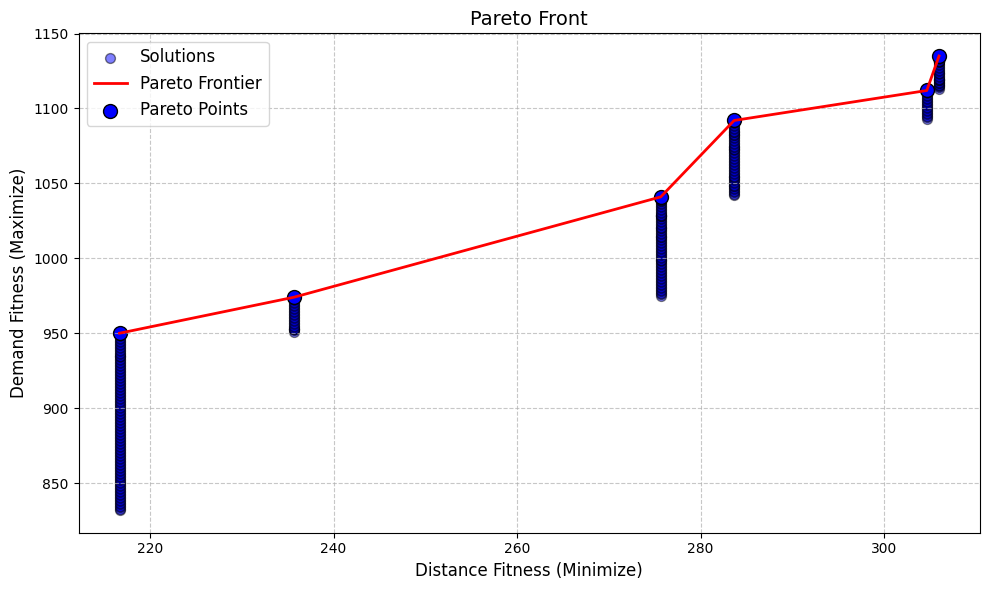

Pareto Frontier Chromosomes:
Point 1 -> Distance Fitness: 216.66666666666666, Demand Fitness: 950
Chromosome: 
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  3  1]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 2 11 11]
  [ 0  0  0]
  [ 1  1 10]
  [ 0  0  0]
  [ 4 10 26]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [16  4 39]
  [ 8 14  5]
  [15  6  6]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [46 35  2]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [12 28 27]
  [21  1 33]
  [ 0  0  0]
  [ 2  4  6]
  [27 28  8]
  [ 1 11  7]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [10  0 18]
  [ 0  0  0]
  [ 0  4  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [42 30 32]
  [ 5 19 23]
  [ 4  4  7]
  [ 0  0  0]
  [ 9  8  7]
  [ 0  0  0]]

 [[ 6  2 13]
  [ 0  0  0]
  [ 0  0  0]
  [12  6 37]
  [ 0  0  0]
  [32 42 20]
  [15  5  1]
  [ 0  0  

In [20]:
# Extract fitness and corresponding chromosomes from the fitness history
distance_fitness = []
demand_fitness = []
chromosome_list = []

# Iterate over the history to extract values
for (current_solution, (current_distance, current_demand)) in fitness_history1:
    distance_fitness.append(current_distance)  # Distance fitness
    demand_fitness.append(current_demand)      # Demand fitness
    chromosome_list.append(current_solution)    # Corresponding chromosome

# Convert to numpy arrays
distance_fitness = np.array(distance_fitness)
demand_fitness = np.array(demand_fitness)
chromosome_list = np.array(chromosome_list)

# Apply Pareto set filtering to get only the Pareto-optimal points
pareto_mask = paretoset(np.array(list(zip(distance_fitness, demand_fitness))), sense=['min', 'max'])
pareto_distance_fitness = distance_fitness[pareto_mask]
pareto_demand_fitness = demand_fitness[pareto_mask]
pareto_chromosome_list = chromosome_list[pareto_mask]

# Plot the Pareto frontier and print the chromosomes associated with each Pareto frontier point
plot_pareto_frontier(distance_fitness, demand_fitness, chromosome_list, pareto_distance_fitness, pareto_demand_fitness, pareto_chromosome_list)


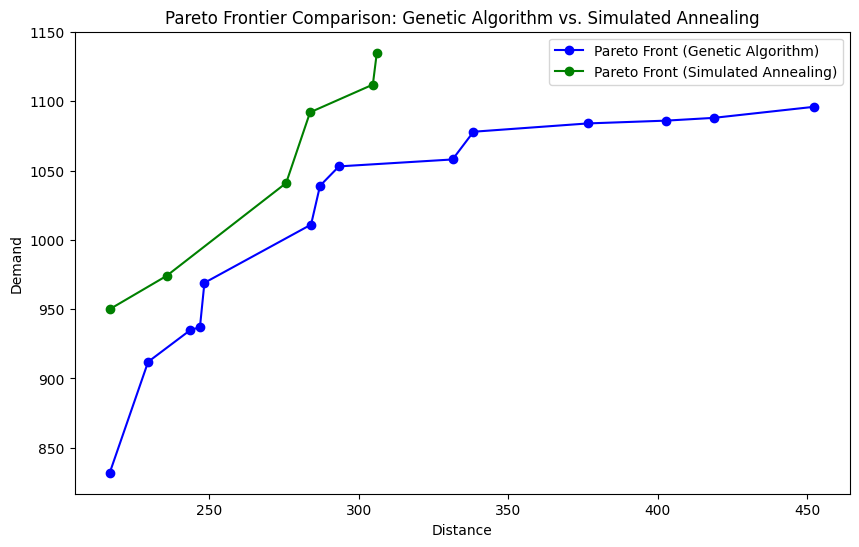

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from paretoset import paretoset  # Make sure to install this if you haven't

# Separate distance and demand fitness values for genetic algorithm
distance_fitness_genetic = []
demand_fitness_genetic = []
chromosome_list_genetic = []
for generation in fitness_history:
    for (fitness, chromosome) in generation:
        distance_fitness_genetic.append(fitness[0])  # Distance fitness
        demand_fitness_genetic.append(fitness[1])    # Demand fitness
        chromosome_list_genetic.append(chromosome)   # Corresponding chromosome

# Separate distance and demand fitness values for simulated annealing
distance_fitness_sa = []
demand_fitness_sa = []
chromosome_list_sa = []
for (current_solution, (current_distance, current_demand)) in fitness_history1:
    distance_fitness_sa.append(current_distance)
    demand_fitness_sa.append(current_demand)
    chromosome_list_sa.append(current_solution)

# Convert lists to numpy arrays for Pareto analysis
distance_demand_genetic = np.column_stack((distance_fitness_genetic, demand_fitness_genetic))
distance_demand_sa = np.column_stack((distance_fitness_sa, demand_fitness_sa))

# Apply Pareto set filtering
pareto_mask_genetic = paretoset(distance_demand_genetic, sense=['min', 'max'])
pareto_mask_sa = paretoset(distance_demand_sa, sense=['min', 'max'])

# Filter and sort Pareto-optimal solutions by distance
pareto_solutions_genetic = distance_demand_genetic[pareto_mask_genetic]
pareto_solutions_sa = distance_demand_sa[pareto_mask_sa]
pareto_solutions_genetic = pareto_solutions_genetic[np.argsort(pareto_solutions_genetic[:, 0])]
pareto_solutions_sa = pareto_solutions_sa[np.argsort(pareto_solutions_sa[:, 0])]

# Plotting Pareto frontiers only
plt.figure(figsize=(10, 6))
plt.plot(pareto_solutions_genetic[:, 0], pareto_solutions_genetic[:, 1], 'bo-', label="Pareto Front (Genetic Algorithm)")
plt.plot(pareto_solutions_sa[:, 0], pareto_solutions_sa[:, 1], 'go-', label="Pareto Front (Simulated Annealing)")

# Labels and legend
plt.xlabel("Distance")
plt.ylabel("Demand")
plt.legend()
plt.title("Pareto Frontier Comparison: Genetic Algorithm vs. Simulated Annealing")
plt.show()
